In [1]:
import nltk
nltk.download_shell()
# d (download) -> stopwords -> q (quit)
# l (list): list of all packages

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------

Download which package (l=list; x=cancel)?


        STRIX\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


## IMPORT AND EXPLORE DATA

In [3]:
# Let's look at the dataset and see what we have
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]
len(messages)

5574

In [6]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [5]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')
sns.set_style('whitegrid')

In [9]:
# Import the dataset to work with it
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label', 'message'])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# Check the sets
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
# Check the sets by label
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [15]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot: ylabel='Frequency'>

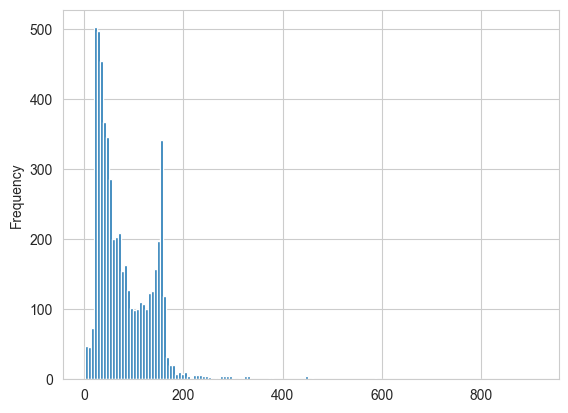

In [20]:
# Visualize the length of the message
messages['length'].plot.hist(bins=150)

In [21]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [24]:
# Check for outliers
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot: title={'center': 'ham'}>,
       <AxesSubplot: title={'center': 'spam'}>], dtype=object)

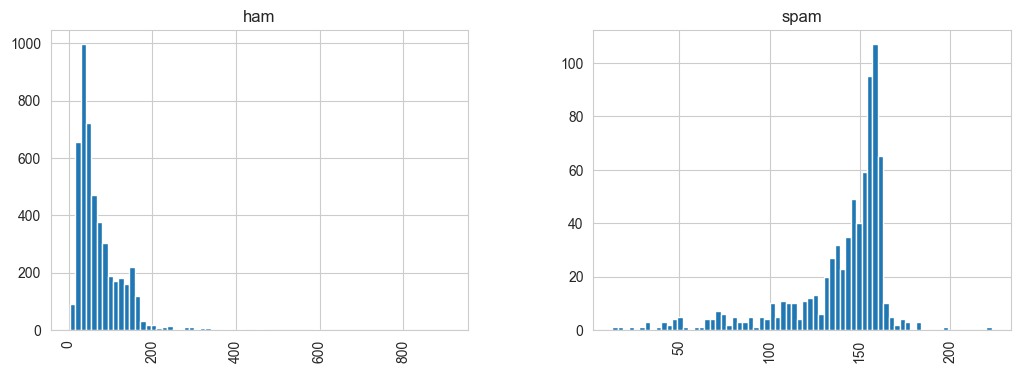

In [25]:
# Visualize the data by label
messages.hist(column='length', by='label', bins = 70, figsize = (12,4))

As shown in the graph, the spam messages tend to have more characters. In the ham graph, the messages are usually around 0 to 200 characters (mean: ~50), whereas the average number of characters for spam messages is ~150.
-> Length is a potential feature to distinguish between ham and spam.

NOTE: Our main issue with the data is that it is all in text format or strings. The classification algorithms above actually need some sort of numerical feature vector in order to perform the classification tasks.

There are many ways to convert a corpus of strings to a vector format. The simplest way is to create a bag of words where each unique word in the text will be represented by one number. We will continue to do this in the next step.

**Stemming** is also a really common way to continue processing text data. It is a technique used to reduce an inflected word down to its word stem. For example, the words "programming", "programmer", and "programs" can all be reduced down to the common word stem "program". In other words, "program" can be used as a synonym for the prior three inflection words.

## CLASSIFY THE DATA

- Write a function to split a message into its individual words and return a list.
- We will also going to remove very common words such as the, a, if, etc. These are known stop words -> using nltk library.


In [27]:
import string
from nltk.corpus import stopwords

#### TESTING

The below code demonstrate how the function works step by step.

In [28]:
# Very common words in English that don't tell you any distinguishing features.
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
mess = 'Sample message! Notice: it has punctuation.'
nopunc = [c for c in mess if c not in string.punctuation]
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [31]:
nopunc = ''.join(nopunc)
nopunc

'Sample message Notice it has punctuation'

In [32]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [33]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

Now, we will move on to write our function.
1. Remove punctuation
2. Remove stop words
3. Return list of clean text words

In [35]:
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [36]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

## VECTORIZATION

Now, we will convert each message, represented as a list of tokens, into a vector that machine learning models can understand. We will do that in 3 steps using the bag-of-words model:
1. Count how many times does a word occur in each message (term frequency).
2. Weight the counts, so that frequent tokens get lower weight (inverse document frequency).
3. Normalize the vectors to unit length to abstract from the original text length (L2 norm)

**STEP 1:**
- Each vector will have as many dimensions as there are unique words in the SMS corpus -> using SciKit Learn's **CountVectorizer** model to convert a collection of text documents to a matrix of token counts. The matrix will be a 2-dimensional one, where the 1-dimension is the entire vocabulary (1 word per row), and the other dimension is the actual documents (1 text message per column)
- Since there are so many messages and so many words, we can expect that we will have a lot of zero counts. Therefore, SciKit Learn will return a **sparse matrix**. 

NOTE:
A sparse matrix is a matrix in which most of the elements are zero. Instead of storing every single value in all the elements, we can just store the sparse matrix to save the memory in our computer.

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
# Create a bag of words
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])
len(bow_transformer.vocabulary_)

11425

In [41]:
# Let's see how the bag of words look like
mess4 = messages['message'][3]
bow4 = bow_transformer.transform([mess4])

In [42]:
mess4

'U dun say so early hor... U c already then say...'

In [46]:
print(bow4)
bow4.shape # 1 x 11425 (our entire vocabulary)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


(1, 11425)

In [49]:
# Grab the word in the matrix (index: y)
bow_transformer.get_feature_names_out()[9554]

'say'

In [51]:
# Now, transform the whole dataset
messages_bow = bow_transformer.transform(messages['message'])

In [52]:
print('Shape of Sparse Matrix: ', messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [53]:
# Amount of non-zero occurrences
messages_bow.nnz

50548

In [55]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity)) # % between non-zero messages and actual total number of messages

sparsity: 0.07940295412668218


**STEP 2:**
- We will move on to weight and normalize the data using TF-IDF.

- Term Frequency: importance of the term within that document. TF(d,t) = number of occurrences of term t in document d.
- Inverse Document Frequency: importance of the term in the corpus. IDF(t) = log(D/t) where D is the total number of documents, t is the number of documents with the term.

**Example:**

Consider a document containing 100 words wherein the word cat appears 3 times. 

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.

In [56]:
from sklearn.feature_extraction.text import TfidfTransformer

In [57]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

Basically, these numbers are a weight value for each of these words versus the actual document.

In [60]:
# Let's see how the TF-IDF transformer look like
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4) # Inverse document frequency and term frequency relationship

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [65]:
# Check the inverse document frequency of a word
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [62]:
# Convert the whole bag of words corpus into a TF-IDF corpus
messages_tfidf = tfidf_transformer.transform(messages_bow)

## Train the model

Now that we finally have the messages represented as numerical vectors, we can train our spam/ham classifier by using any classification. In this project, we will use Naive-bayes classifier.

In [81]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [64]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [67]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [68]:
messages['label'][3]

'ham'

In [69]:
all_pred = spam_detect_model.predict(messages_tfidf)
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

- In order to evaluate our model, we will split the data into 2 sets to train and test the data.
- After splitting the data, we can repeat the whole process above. However, it will take a long time. Instead, we can use data pipeline feature of sklearn.

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.3)

In [73]:
from sklearn.pipeline import Pipeline

In [74]:
# Pipeline(step)
# The step is a list of steps we need. Each step is represented by a tuple of (name, <method>)
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [75]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001B1A217E8B0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [76]:
predictions = pipeline.predict(msg_test)

In [77]:
from sklearn.metrics import classification_report

In [79]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1443
        spam       1.00      0.71      0.83       229

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672



In [82]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
])

In [85]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001B1A217E8B0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [86]:
predictions = pipeline.predict(msg_test)

In [87]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1443
        spam       0.99      0.79      0.88       229

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.93      1672
weighted avg       0.97      0.97      0.97      1672

